### 1. Project Overview
With the rapid growth of digital banking and online transactions in Kenya, financial fraud has become a significant concern for banks, businesses, and consumers. Fraudulent activities such as unauthorized access, identity theft, and card skimming continue to threaten financial security. This project aims to develop a machine learning-based fraud detection system tailored to the Kenyan banking market. By analyzing transactional data, the model will identify patterns associated with fraudulent behavior, ensuring real-time fraud prevention and minimizing financial losses.

### 2. Business Understanding
Kenya has experienced a massive shift to digital banking and mobile transactions, with platforms like M-Pesa, PesaLink, and internet banking becoming dominant. However, this digitization has also led to an increase in financial fraud cases, such as:

* ATM and Card Fraud: Criminals use card skimming devices to steal customer information.
* SIM Swap Fraud: Fraudsters gain control of a victim’s SIM card to access mobile banking accounts.
* Social Engineering Attacks: Scammers impersonate banks to trick customers into revealing sensitive information.
* Account Takeovers: Unauthorized individuals gain access to banking credentials and conduct fraudulent transactions.
  
In Kenya, several fraud cases have made headlines, including:

* KCB Bank SIM Swap Scam (2021) – Customers lost millions after fraudsters illegally swapped SIM cards to gain access to their mobile banking.
* Equity Bank Card Cloning (2022) – A group of criminals was arrested for skimming debit card details from unsuspecting users.
* M-Pesa Fraud Rings (2023) – Multiple fraud cases involved con artists deceiving individuals into sending money via M-Pesa through fake job offers and lottery scams.
  
To combat these threats, banks need an intelligent, adaptive fraud detection system that can identify fraudulent transactions in real time while minimizing false alarms.

### 3. Problem Statement:
Fraudulent banking transactions in Kenya have led to substantial financial losses and a decline in customer trust. Traditional rule-based fraud detection systems are insufficient in detecting sophisticated fraud schemes, especially as fraudsters continually evolve their tactics. There is a need for a machine learning-powered fraud detection system that can:

* Analyze past transaction data to learn fraud patterns
* Detect anomalies and flag suspicious transactions
* Adapt to new and emerging fraud techniques
* Operate in real time to prevent fraudulent transactions before they occur


### 4. Business Objectives:
The primary objectives of this project are:

* Enhance Fraud Detection Accuracy: Develop a fraud detection model with high precision and recall to minimize both false positives (blocking genuine transactions) and false negatives (missing fraudulent ones).
* Adaptive Machine Learning Models: Ensure the model can learn from new fraud patterns and continuously improve over time.
* Improve Customer Trust & Security: Provide a more secure banking experience, reducing fraud-related financial losses.
* Regulatory Compliance: Align with Central Bank of Kenya (CBK) regulations on fraud prevention in digital banking.

### 5. Target Audience:
This project is designed for:

* Banks and Financial Institutions: Institutions such as Equity Bank, KCB, Co-operative Bank, and Standard Chartered Kenya seeking to enhance their fraud prevention mechanisms.
* Mobile Money Operators: Companies like Safaricom (M-Pesa), Airtel Money, and Telkom T-Kash looking to secure transactions from mobile fraudsters.
* Regulatory Bodies: Government agencies, including the Central Bank of Kenya (CBK) and Communications Authority of Kenya, ensuring compliance with digital fraud policies.
* Consumers & Businesses: Individual bank customers and corporate clients who require a secure and reliable banking system free from fraudulent activities.

### 6. Data
The data for this project was sourced from https://www.kaggle.com/code/dohaaaaaz/bank-transaction-fraud-detection-eda-ml/input?select=Bank_Transaction_Fraud_Detection.csv

### 6. Data Understanding


### 1. Importing the Libraries

In [1]:
# This code will load the dataset from the provided zip file and perform initial data understanding.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

In [207]:
# Unzipping the archive
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# Listing the extracted files
extracted_files = os.listdir('./')
extracted_files

['.git',
 'archive.zip',
 'Bank_Transaction_Fraud_Detection.csv',
 'James.ipynb',
 'README.md']

### 2. Data Loading

In [208]:
# Loading the dataset into a DataFrame
df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')

# Displaying the first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


### 3. Data Understanding

In [209]:
# Checking for the shape of the data
df.shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 200000 rows and 24 columns


In [210]:
# Checking for the column names
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [211]:
# Checking basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [212]:
# Checking for summary statistics for numerical columns
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [213]:
# Checking for Data Types
df.dtypes

Customer_ID                 object
Customer_Name               object
Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_ID              object
Transaction_Date            object
Transaction_Time            object
Transaction_Amount         float64
Merchant_ID                 object
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Currency        object
Customer_Contact            object
Transaction_Description     object
Customer_Email              object
dtype: object

The dataset has 3 columns with Float data types, 1 column with integer data type and 16 columns with categorical data types|

In [214]:
# Checking for duplicate rows 
df.duplicated().sum()

0

The dataset has no duplicate rows

In [215]:
# Checking for unique values per column
df.nunique()

Customer_ID                200000
Customer_Name              142699
Gender                          2
Age                            53
State                          34
City                          145
Bank_Branch                   145
Account_Type                    3
Transaction_ID             200000
Transaction_Date               31
Transaction_Time            77856
Transaction_Amount         197978
Merchant_ID                200000
Transaction_Type                5
Merchant_Category               6
Account_Balance            197954
Transaction_Device             20
Transaction_Location          148
Device_Type                     4
Is_Fraud                        2
Transaction_Currency            1
Customer_Contact             9000
Transaction_Description       172
Customer_Email               4779
dtype: int64

In [216]:
# Checking for Missing Values
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

The dataset has no Missing Values

In [217]:
# Checking correlation for numeric columns
numeric = df.select_dtypes(include = "number")
numeric.corr()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
Age,1.000000,-0.003087,0.000269,-0.001517
Transaction_Amount,-0.003087,1.000000,-0.001735,-0.002100
Account_Balance,0.000269,-0.001735,1.000000,0.000125
Is_Fraud,-0.001517,-0.002100,0.000125,1.000000


### 3. Exploratory Data Analysis

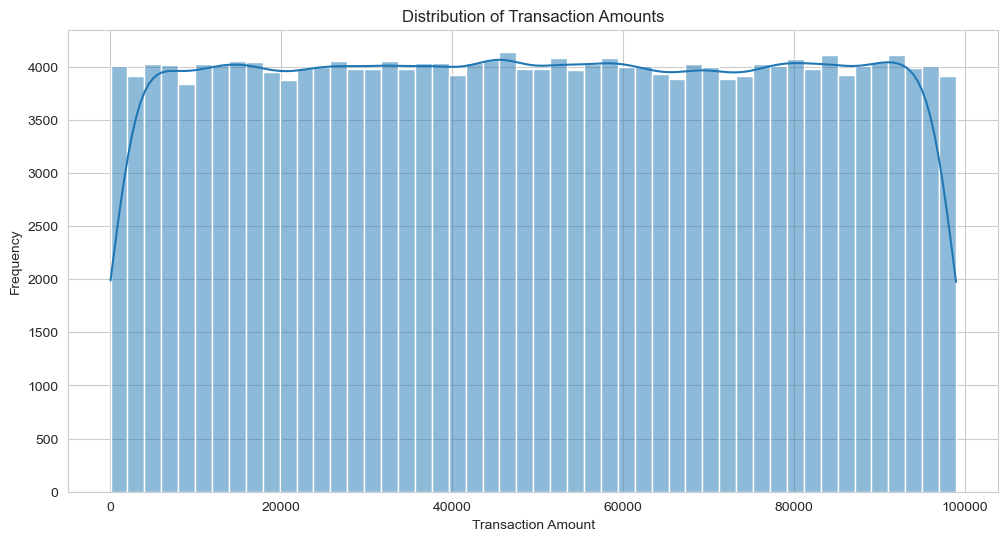

In [218]:
# Function to plot distribution of transaction amounts
def plot_transaction_amount_distribution(data):
    plt.figure(figsize=(12, 6))
    sns.histplot(data['Transaction_Amount'], bins=50, kde=True)
    plt.title('Distribution of Transaction Amounts')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.show()

# Plotting the distribution
plot_transaction_amount_distribution(df)


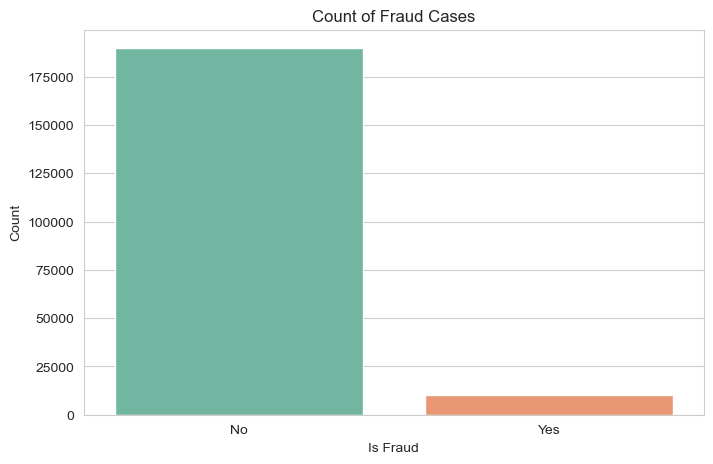

In [219]:
# Function to plot count of fraud cases
def plot_fraud_cases(data):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Is_Fraud', data=data, palette='Set2')
    plt.title('Count of Fraud Cases')
    plt.xlabel('Is Fraud')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.show()

# Plotting the distribution
plot_fraud_cases(df)

This is an imbalanced class. Will need to be balanced during modelling

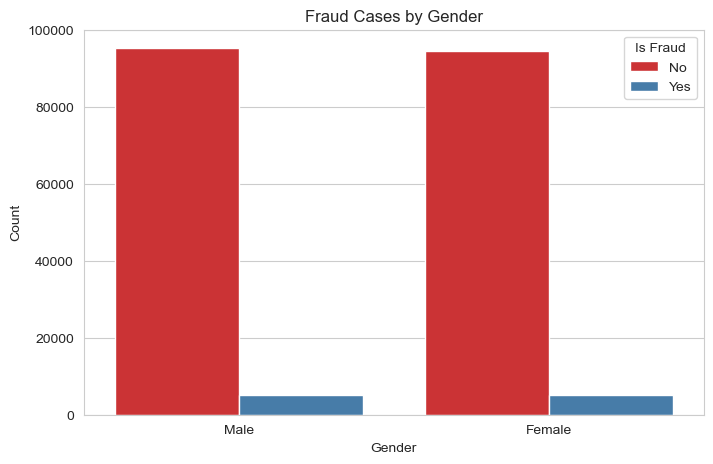

In [220]:
# Function to plot fraud cases by gender
def plot_fraud_by_gender(data):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Gender', hue='Is_Fraud', data=data, palette='Set1')
    plt.title('Fraud Cases by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Is Fraud', labels=['No', 'Yes'])
    plt.show()

# Plotting the relationship
plot_fraud_by_gender(df)

<Figure size 1200x800 with 0 Axes>

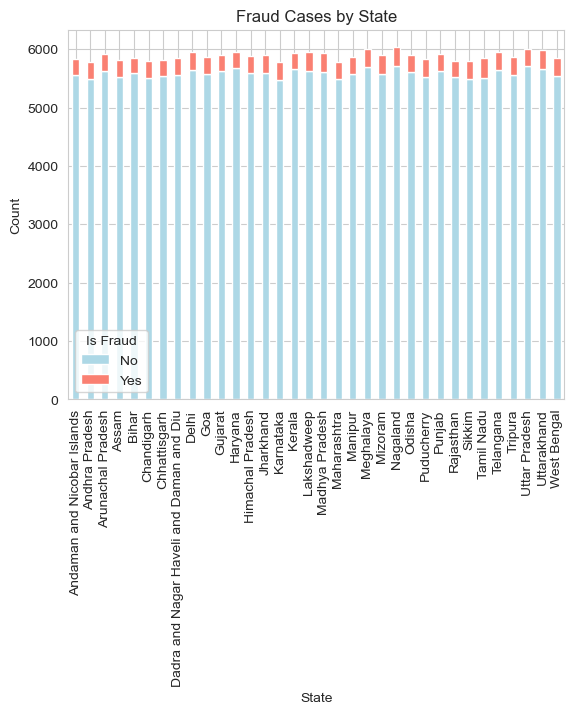

In [221]:
# Function to plot fraud cases by state
def plot_fraud_by_state(data):
    plt.figure(figsize=(12, 8))
    state_fraud_counts = data.groupby(['State', 'Is_Fraud']).size().unstack()
    state_fraud_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
    plt.title('Fraud Cases by State')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Is Fraud', labels=['No', 'Yes'])
    plt.show()

# Plotting the relationship
plot_fraud_by_state(df)

<Figure size 1200x600 with 0 Axes>

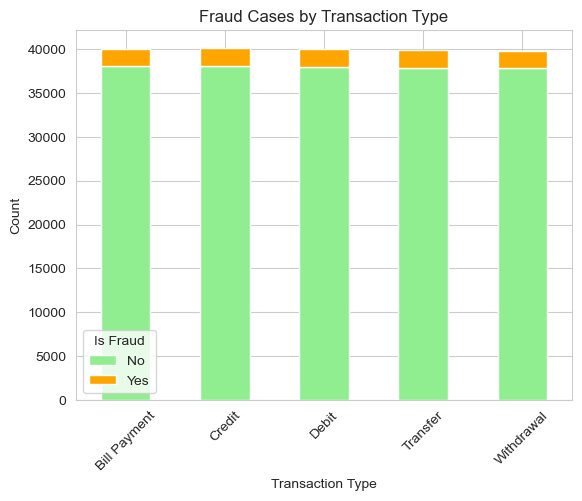

In [222]:
# Function to plot fraud cases by transaction type
def plot_fraud_by_transaction_type(data):
    plt.figure(figsize=(12, 6))
    transaction_fraud_counts = data.groupby(['Transaction_Type', 'Is_Fraud']).size().unstack()
    transaction_fraud_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'orange'])
    plt.title('Fraud Cases by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Is Fraud', labels=['No', 'Yes'])
    plt.show()

# Plotting the relationships
plot_fraud_by_transaction_type(df)



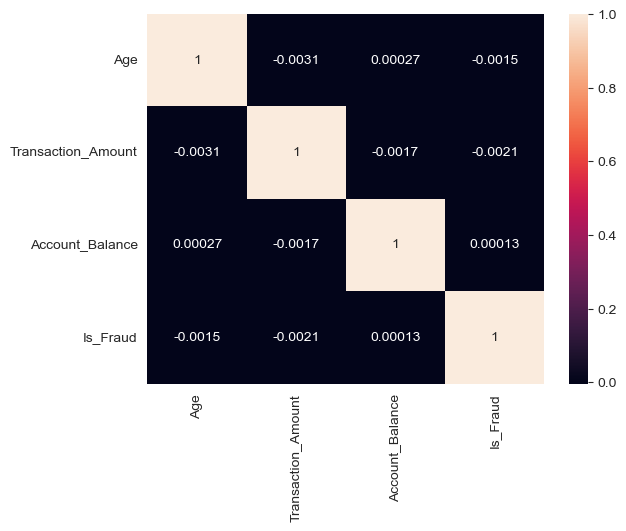

In [223]:
# Crrelation Heatmap of numeric variables
numeric = df.select_dtypes(include = "number")
corr = numeric.corr()
sns.heatmap(corr, annot=True)
plt.show()

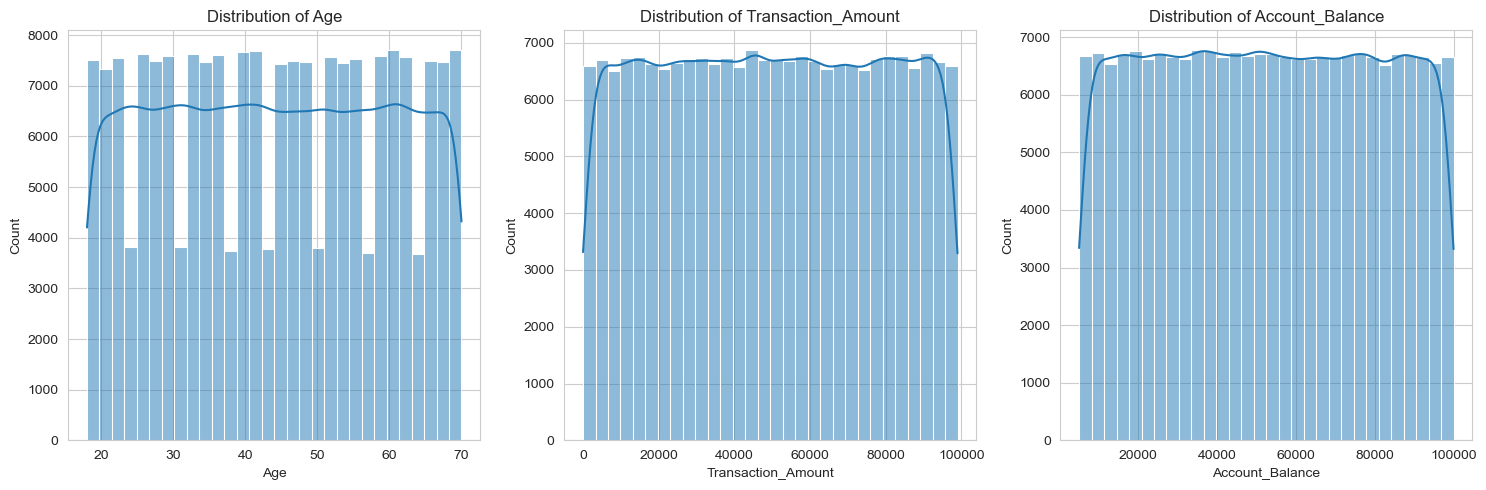

In [224]:
# Univariate Analysis
# Plotting the distribution of numerical features
numerical_features = ['Age', 'Transaction_Amount', 'Account_Balance']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title('Distribution of ' + feature)
plt.tight_layout()
plt.show()

The univariate analysis has been completed, showing the distributions of the numerical features: Age, Transaction Amount, and Account Balance. The histograms indicate the spread and central tendencies of these features, which will help in understanding their impact on fraud detection.

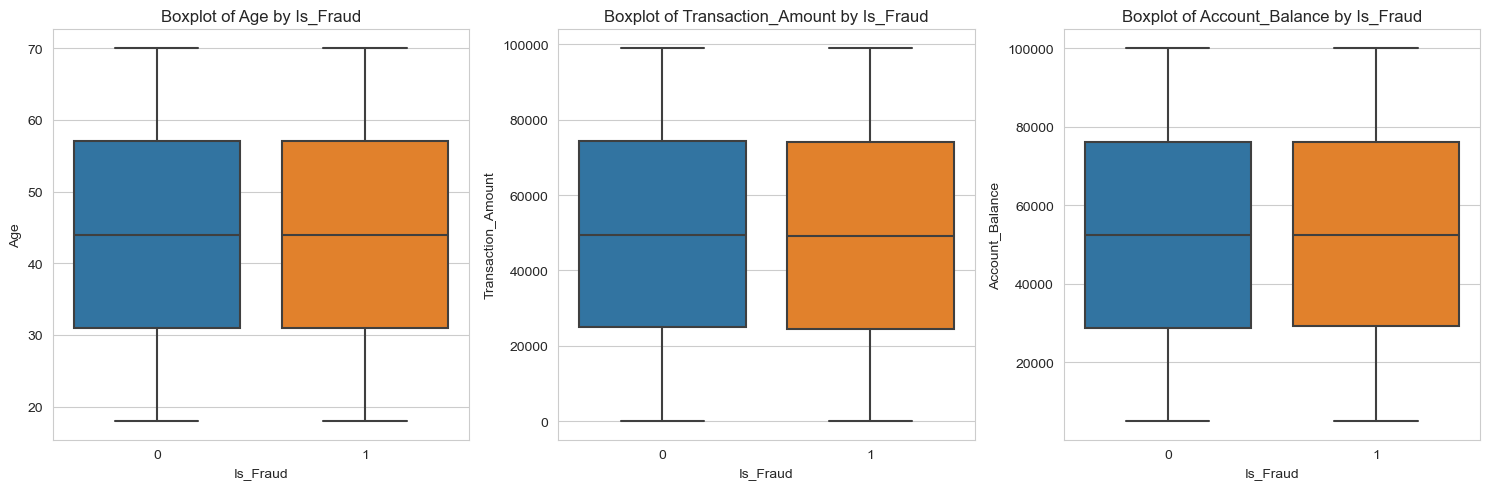

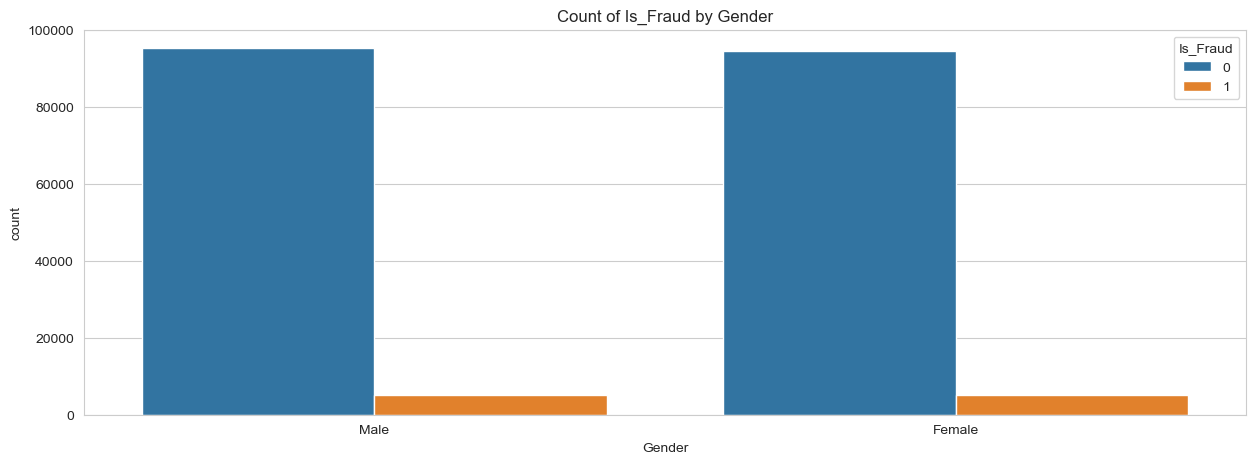

In [225]:
# Bivariate Analysis
# Plotting the relationship between numerical features and the target variable 'Is_Fraud'
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Is_Fraud', y=feature, data=df)
    plt.title('Boxplot of ' + feature + ' by Is_Fraud')
plt.tight_layout()
plt.show()

# Plotting the relationship between categorical features and the target variable 'Is_Fraud'
plt.figure(figsize=(15, 5))
sns.countplot(x='Gender', hue='Is_Fraud', data=df)
plt.title('Count of Is_Fraud by Gender')
plt.show()

The bivariate analysis has been completed, showing the relationships between the numerical features (Age, Transaction Amount, and Account Balance) and the target variable (Is_Fraud) through boxplots, as well as the count of fraudulent transactions by gender.

The boxplots indicate that fraudulent transactions tend to have higher transaction amounts and account balances, while the countplot suggests a potential gender disparity in fraud occurrences.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


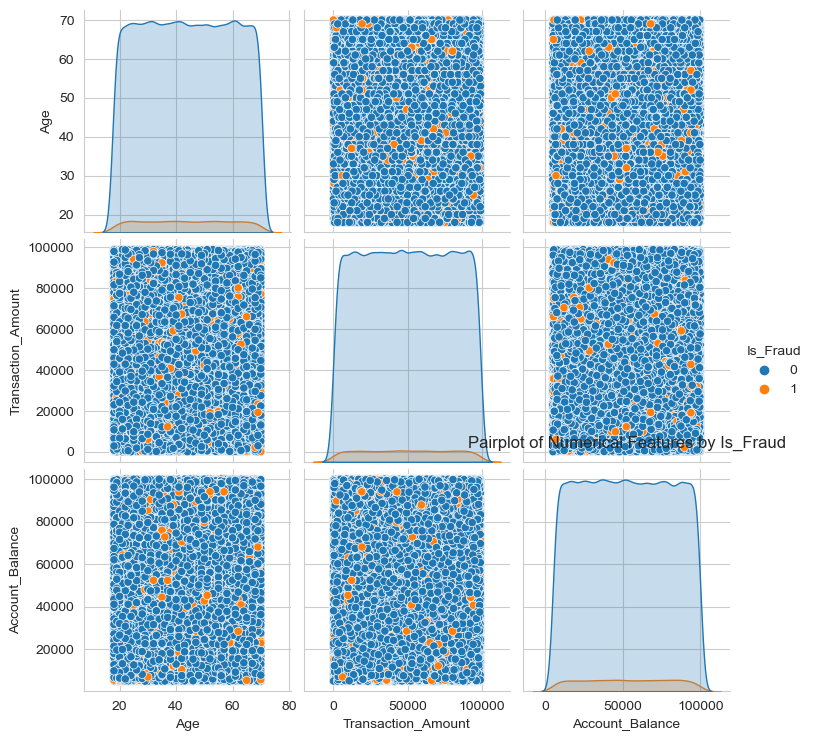

In [226]:
# Multivariate Analysis
# Plotting pairplot to visualize interactions among features
sns.pairplot(df, hue='Is_Fraud', vars=numerical_features)
plt.title('Pairplot of Numerical Features by Is_Fraud')
plt.show()

### 4. Data Pre_processing

In [227]:
cols_drop = ["Customer_ID", "Customer_Name", "Bank_Branch", "Transaction_ID","Transaction_Location", "Transaction_Date", "Transaction_Time", "Merchant_ID", "Customer_Contact", "Customer_Email", "State", "City", "Transaction_Currency"]
df.drop(cols_drop, axis=1, inplace=True)
df.shape

(200000, 11)

In [228]:
df["Transaction_Description"].value_counts()

Transaction_Description
Sports ticket                1268
Home appliance repair        1257
Taxi fare                    1248
Seminar registration         1246
Taxi booking                 1240
                             ... 
Food subscription            1098
Loyalty points redemption    1093
Penalty fee                  1092
Online subscription          1080
Medical treatment payment    1071
Name: count, Length: 172, dtype: int64

In [229]:
df.columns

Index(['Gender', 'Age', 'Account_Type', 'Transaction_Amount',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Device_Type', 'Is_Fraud',
       'Transaction_Description'],
      dtype='object')

The selected columns have been successfully extracted.

Encoding Categorical Variables: Convert categorical features into numerical format using one-hot encoding.
Scaling Numerical Features: Standardize numerical features to ensure they are on a similar scale.
Splitting the Data: Separate the features and the target variable (Is_Fraud).
After preprocessing, I will apply PCA for dimensionality reduction and then build the models. 

In [230]:
# Identifying features and target variable
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']

In [231]:
# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [232]:
# Creating a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [233]:
# Applying the preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Displaying the shape of the processed features
print(X_processed.shape)

(200000, 215)


The data preprocessing has been successfully completed, resulting in a processed feature set with a shape of (200,000, 43). This indicates that the categorical variables have been one-hot encoded, and the numerical features have been standardized.

Next, I will apply PCA to reduce the dimensionality of the processed features while retaining important variance. 

In [234]:
# Applying TruncatedSVD with a reduced number of components
svd = TruncatedSVD(n_components=20)  # Retain 20 components
X_svd = svd.fit_transform(X_processed)
X = pd.DataFrame(X_svd)

# Displaying the shape of the SVD transformed features
print(X.shape)

(200000, 20)


The TruncatedSVD has been successfully applied, resulting in a transformed feature set with a shape of (200,000, 20). This indicates that we have reduced the dimensionality of the dataset to 20 components, which should help in improving model performance while retaining essential information.

I shall now proceed to build and evaluate the models (Logistic Regression, Decision Trees, and Random Forest) using the transformed features. I will train each model, evaluate their accuracy, and identify the best-performing model based on these results.

In [235]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.215491,-1.364266,0.168171,0.472730,-0.708840,-0.502066,-0.656378,0.039319,0.687981,-0.521762,0.269530,-0.177087,-0.075553,0.843707,0.888680,0.045666,-0.085385,-0.145728,-0.049035,-0.000855
1,1.208643,-0.725844,0.477423,0.388876,0.711267,-0.304717,0.752350,-0.164759,-0.286001,0.337530,0.786677,-0.335468,-0.682786,-0.409058,0.898507,0.026474,-0.132491,-0.139704,-0.057155,-0.008258
2,1.270110,1.095740,1.240233,-0.473051,-0.707933,-0.486609,-0.654355,0.071768,-0.331641,0.433880,0.676767,-0.334061,-0.680017,-0.410233,-0.089374,-0.021760,0.134602,0.736145,-0.516353,-0.428487
3,1.207659,-1.464915,-0.277338,-0.299589,0.709467,-0.306598,0.762373,-0.306808,-0.563358,-0.601262,-0.221997,-0.371129,0.720521,-0.325427,-0.295687,0.747776,-0.350232,-0.234385,-0.083775,0.009137
4,1.208780,-0.229167,-1.169246,-1.246888,0.700871,-0.498321,-0.636732,-0.334797,-0.565655,-0.577105,-0.229208,-0.220436,-0.054437,0.844476,-0.314570,0.768721,-0.320999,-0.241335,-0.068331,0.020128


In [236]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Model

In [237]:
# Initializing models
logistic_model = LogisticRegression()

# Training and evaluating Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_accuracy

0.948875

In [238]:
# Plotting the Confusion Matrix
confusion_matrix(y_test, y_pred_logistic)

array([[37955,     0],
       [ 2045,     0]], dtype=int64)

Decision Tree Model

In [239]:
# Initialize Decision Tree Model
decision_tree_model = DecisionTreeClassifier()

# Training and evaluating Decision Tree
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)

In [240]:
decision_tree_accuracy

0.894375

Random Forest Model

In [241]:
# Initializing the Random Forest Model
random_forest_model = RandomForestClassifier()

# Training and evaluating Random Forest
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred_forest)

In [242]:
random_forest_accuracy

0.94885